In [106]:
import csv

with open('Downloads\enjoysport.csv', 'r') as csvfile:
    data = list(csv.reader(csvfile))

print(data)

print("\nThe total number of training instances are:", len(data))

num_attributes = len(data[0]) - 1
hypothesis = ['0'] * num_attributes
print("\nThe initial hypothesis is:", hypothesis)

for i, instance in enumerate(data):
    if instance[num_attributes] == 'yes':
        for j in range(num_attributes):
            if hypothesis[j] == '0' or hypothesis[j] == instance[j]:
                hypothesis[j] = instance[j]
            else:
                hypothesis[j] = '?'
    print(f"\nThe hypothesis after training instance {i + 1} is:", hypothesis)

print("\nThe Maximally specific hypothesis is:", hypothesis)

[['sky', 'airtemp', 'humidity', 'wind', 'water', 'forcast', 'enjoysport'], ['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'], ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes'], ['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no'], ['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']]

The total number of training instances are: 5

The initial hypothesis is: ['0', '0', '0', '0', '0', '0']

The hypothesis after training instance 1 is: ['0', '0', '0', '0', '0', '0']

The hypothesis after training instance 2 is: ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']

The hypothesis after training instance 3 is: ['sunny', 'warm', '?', 'strong', 'warm', 'same']

The hypothesis after training instance 4 is: ['sunny', 'warm', '?', 'strong', 'warm', 'same']

The hypothesis after training instance 5 is: ['sunny', 'warm', '?', 'strong', '?', '?']

The Maximally specific hypothesis is: ['sunny', 'warm', '?', 'strong', '?', '?']


In [76]:
import pandas as pd
import numpy as np


data=pd.read_csv('Downloads\enjoysport.csv')
concept=data.iloc[:,:-1].values
target=data.iloc[:,-1].values

def learn(concept,target):
    specific_h=concept[0].copy()
    general_h=[['?' for _ in range(len(specific_h))] for _ in range(len(specific_h))]

    for i,h in enumerate(concept):
        if target[i]=='yes':
            for x in range(len(specific_h)):
                if h[x]!=specific_h[x]:
                    specific_h[x]='?'
                    general_h[x][x]='?'
        else:
            for x in range(len(specific_h)):
                if h[x]!=specific_h[x]:
                    general_h[x][x]=specific_h[x]
                else:
                    general_h[x][x]='?'

    general_h=[h for h in general_h if h!=['?'for _ in range(len(specific_h) )]]
    return specific_h,general_h

s_final,g_final=learn(concept,target)
print('final specific:',s_final)
print('final general:',g_final)

final specific: ['sunny' 'warm' '?' 'strong' '?' '?']
final general: [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?']]


In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

customer_df=pd.read_csv('Downloads\customer.csv')
product_df=pd.read_csv("Downloads\product.csv")
order_df=pd.read_csv('Downloads\order.csv')

merged_df=customer_df.merge(order_df,on='customer_id').merge(product_df,on='product_id')
merged_df['total_price']=merged_df['quantity'] * merged_df['price']
merged_df['feedback']=np.where(merged_df['quantity']>1,'good','bad')
print('cleaned data:',merged_df)

feature=OrdinalEncoder().fit_transform(merged_df)
target=LabelEncoder().fit_transform(merged_df['feedback'])
print("Features:",feature)
print("Target:",target)

cleaned data:    customer_id       name  age                email  order_id  product_id  \
0          101  vaishnavi   18  vaishnavi@gmail.com       301         201   
1          102    prithvi   20    prithvi@gmail.com       302         202   
2          103    swasthi   19    swasthi@gmail.com       303         203   
3          104     sakshi   22     sakshi@gmail.com       304         204   
4          105     shreya   21     shreya@gmail.com       305         205   

   quantity product_name  price  total_price feedback  
0         2        mouse     20           40     good  
1         1     keyboard    150          150      bad  
2         3      monitor    500         1500     good  
3         2      printer    600         1200     good  
4         1       laptop   1000         1000      bad  
Features: [[0. 4. 0. 4. 0. 0. 1. 3. 0. 0. 1.]
 [1. 0. 2. 0. 1. 1. 0. 0. 1. 1. 0.]
 [2. 3. 1. 3. 2. 2. 2. 2. 2. 4. 1.]
 [3. 1. 4. 1. 3. 3. 1. 4. 3. 3. 1.]
 [4. 2. 3. 2. 4. 4. 0. 1. 4. 2. 0

Accuracy score:,0.9

Classification report:,              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30




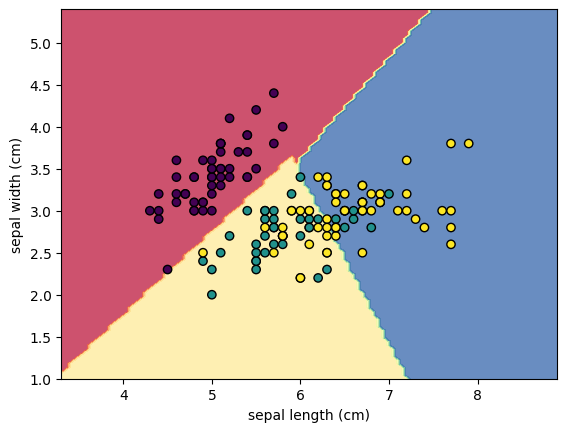

In [77]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC

data=load_iris()
X,y=data.data[:,:2],data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

svm=SVC(kernel='linear',gamma=0.5,C=1.0).fit(X,y)
DecisionBoundaryDisplay.from_estimator(svm,X,cmap=plt.cm.Spectral,alpha=.8)
y_pred=svm.predict(X_test)
print(f'Accuracy score:,{accuracy_score(y_test,y_pred)}\n')
print(f'Classification report:,{classification_report(y_test,y_pred)}\n')

plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

Accuracy score:1.00

classification report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




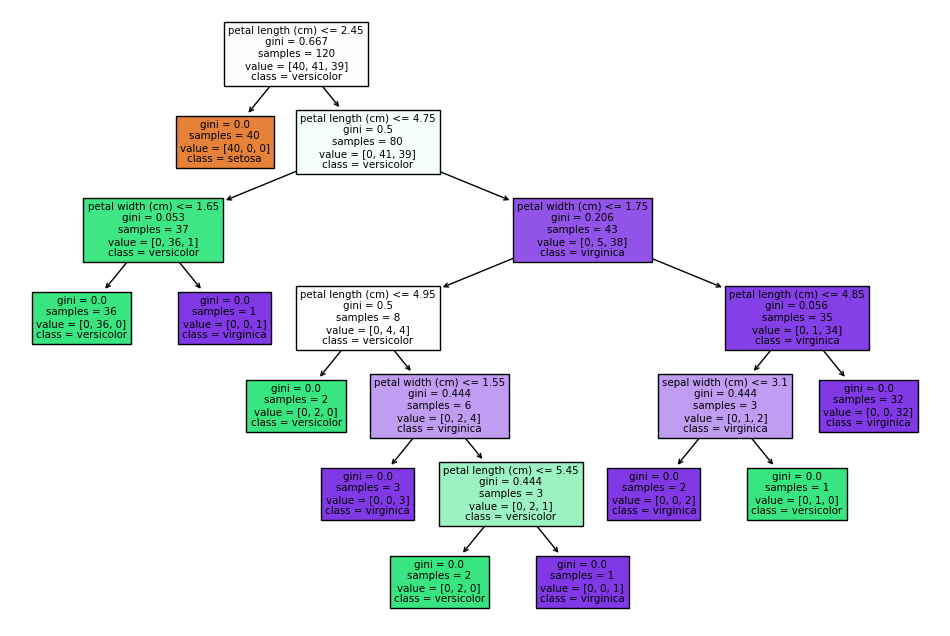

In [87]:
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

iris=load_iris()
X,y=iris.data,iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(f'Accuracy score:{accuracy_score(y_test,y_pred):.2f}\n')
print(f'classification report:{classification_report(y_test,y_pred)}\n')

plt.figure(figsize=(12,8))
tree.plot_tree(clf,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()


Accuracy score:1.0

Classification report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53




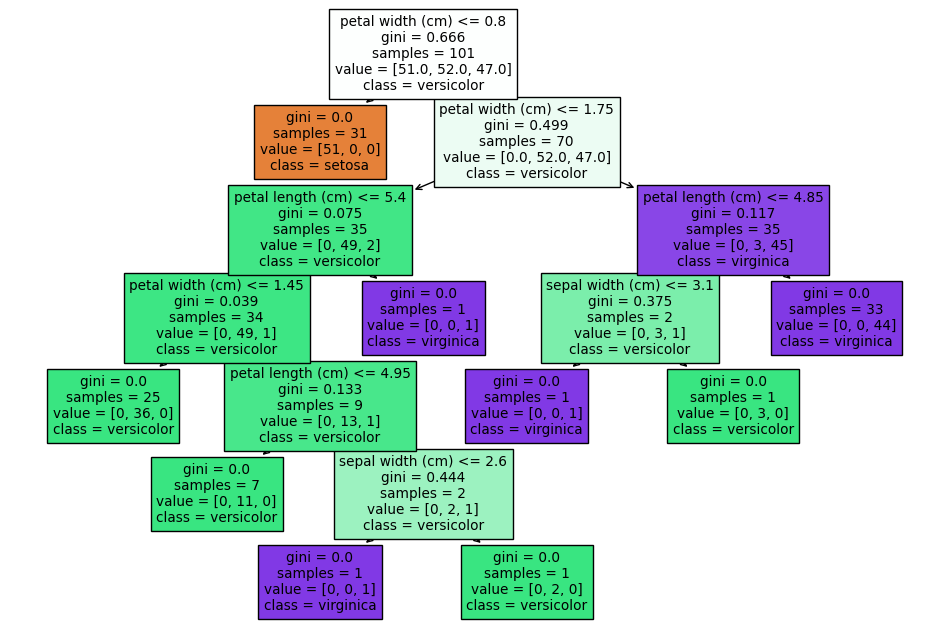

In [95]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris=load_iris()
X,y=iris.data,iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=42)
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42).fit(X,y)
y_pred=rf_classifier.predict(X_test)

print(f'Accuracy score:{accuracy_score(y_test,y_pred)}\n')
print(f'Classification report:{classification_report(y_test,y_pred)}\n')

plt.figure(figsize=(12,8))
tree.plot_tree(rf_classifier.estimators_[0],feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()


In [99]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

newsgroups=fetch_20newsgroups(subset='all')
X_train,X_test,y_train,y_test=train_test_split(newsgroups.data,newsgroups.target,test_size=0.2,random_state=42)

vectorizer=TfidfVectorizer(stop_words='english')
X_train_tfidf=vectorizer.fit_transform(X_train)
X_test_tfidf=vectorizer.transform(X_test)

nb=MultinomialNB().fit(X_train_tfidf,y_train)
y_pred=nb.predict(X_test_tfidf)
print(f'Accuracy score:{accuracy_score(y_test,y_pred)}\n')
print(f'Classification score:{classification_report(y_test,y_pred)}')

Accuracy score:0.8785145888594165

Classification score:              precision    recall  f1-score   support

           0       0.85      0.86      0.86       151
           1       0.88      0.84      0.86       202
           2       0.87      0.85      0.86       195
           3       0.65      0.85      0.74       183
           4       0.94      0.87      0.90       205
           5       0.95      0.85      0.90       215
           6       0.93      0.72      0.81       193
           7       0.91      0.94      0.92       196
           8       0.89      0.95      0.92       168
           9       0.95      0.95      0.95       211
          10       0.90      0.99      0.94       198
          11       0.91      0.97      0.94       201
          12       0.92      0.82      0.86       202
          13       0.97      0.94      0.96       194
          14       0.88      0.99      0.93       189
          15       0.72      0.99      0.83       202
          16       0.81  

In [100]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

data='Downloads\iris.csv'
df=pd.read_csv(data,header=None,names=['sepal_length','sepal_width','petal_length','petal_width','class'])

X_train,X_test,y_train,y_test=train_test_split(df.drop('class',axis=1),df['class'],test_size=0.2,random_state=42)
model=GaussianNB().fit(X_train,y_train)

y_pred=model.predict(X_test)
print(f'Accuracy score:{accuracy_score(y_test,y_pred)}\n')
print(f'Classification report:{classification_report(y_test,y_pred)}\n')


Accuracy score:1.0

Classification report:                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30




In [102]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

data = pd.read_csv('Downloads\heart.csv')[['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'target']]
print(data.head())

model = BayesianNetwork([('age', 'target'), ('sex', 'target'), ('cp', 'target'),
                         ('thalach', 'target'), ('exang', 'target'), ('oldpeak', 'target')])
model.fit(data, estimator=MaximumLikelihoodEstimator)

inference = VariableElimination(model)
evidence = {'age': 63, 'sex': 1, 'cp': 1, 'thalach': 150, 'exang': 0, 'oldpeak': 2.3}
result = inference.query(variables=['target'], evidence=evidence)
print(result)

   age  sex  cp  thalach  exang  oldpeak  target
0   52    1   0      168      0      1.0       0
1   53    1   0      155      1      3.1       0
2   70    1   0      125      1      2.6       0
3   61    1   0      161      0      0.0       0
4   62    0   0      106      0      1.9       0
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5000 |
+-----------+---------------+
| target(1) |        0.5000 |
+-----------+---------------+


In [103]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
text_data = [
    "I love programming in Python",
    "JavaScript is a versatile language",
    "Python is great for data science",
    "I enjoy web development with JavaScript",
    "Data analysis with Python is interesting",
    "Web development in Python is also possible",
    "I prefer JavaScript for frontend development",
    "Machine learning is fascinating",
    "Deep learning is a subset of machine learning",
    "JavaScript frameworks are powerful",
]

labels = [
    "Python",
    "JavaScript",
    "Python",
    "JavaScript",
    "Python",
    "Python",
    "JavaScript",
    "Machine Learning",
    "Machine Learning",
    "JavaScript",
]
X_train, X_test, y_train, y_test = train_test_split(text_data, labels, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

nb = MultinomialNB().fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_test_tfidf)
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}\n')
print(f'Classification report:\n{classification_report(y_test, y_pred)}')


Accuracy score: 0.5

Classification report:
                  precision    recall  f1-score   support

      JavaScript       1.00      1.00      1.00         1
Machine Learning       0.00      0.00      0.00         1
          Python       0.00      0.00      0.00         0

        accuracy                           0.50         2
       macro avg       0.33      0.33      0.33         2
    weighted avg       0.50      0.50      0.50         2



c:\Users\User\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\miniconda3\lib\site-packages\sklea

In [24]:
!pip install pgmpy


  Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)
  Using cached filelock-3.15.4-py3-none-any.whl (16 kB)
  Using cached fsspec-2024.6.1-py3-none-any.whl (177 kB)
  Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
